In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

In [2]:
pwd

'/Volumes/Mac Pro Bay 2 2TB/OneDrive/07Oct-Z_solar'

In [12]:
prefix = "./"
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

z = "16.0"; i = "1540" 
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")

In [13]:
# Slightly offset bins so we can see the data.
xrange1 = np.logspace(-10,0,51) # 1e-10, 1e-9.8, 1e-9.6, ... 
xrange2 = np.logspace(-9.98,0.02,51) # 1e-9.96, 1e-9.76, 1e-9.56, ... 
xrange3 = np.logspace(-9.96,0.04,51) # 1e-9.92, 1e-9.72, 1e-9.52, ... 

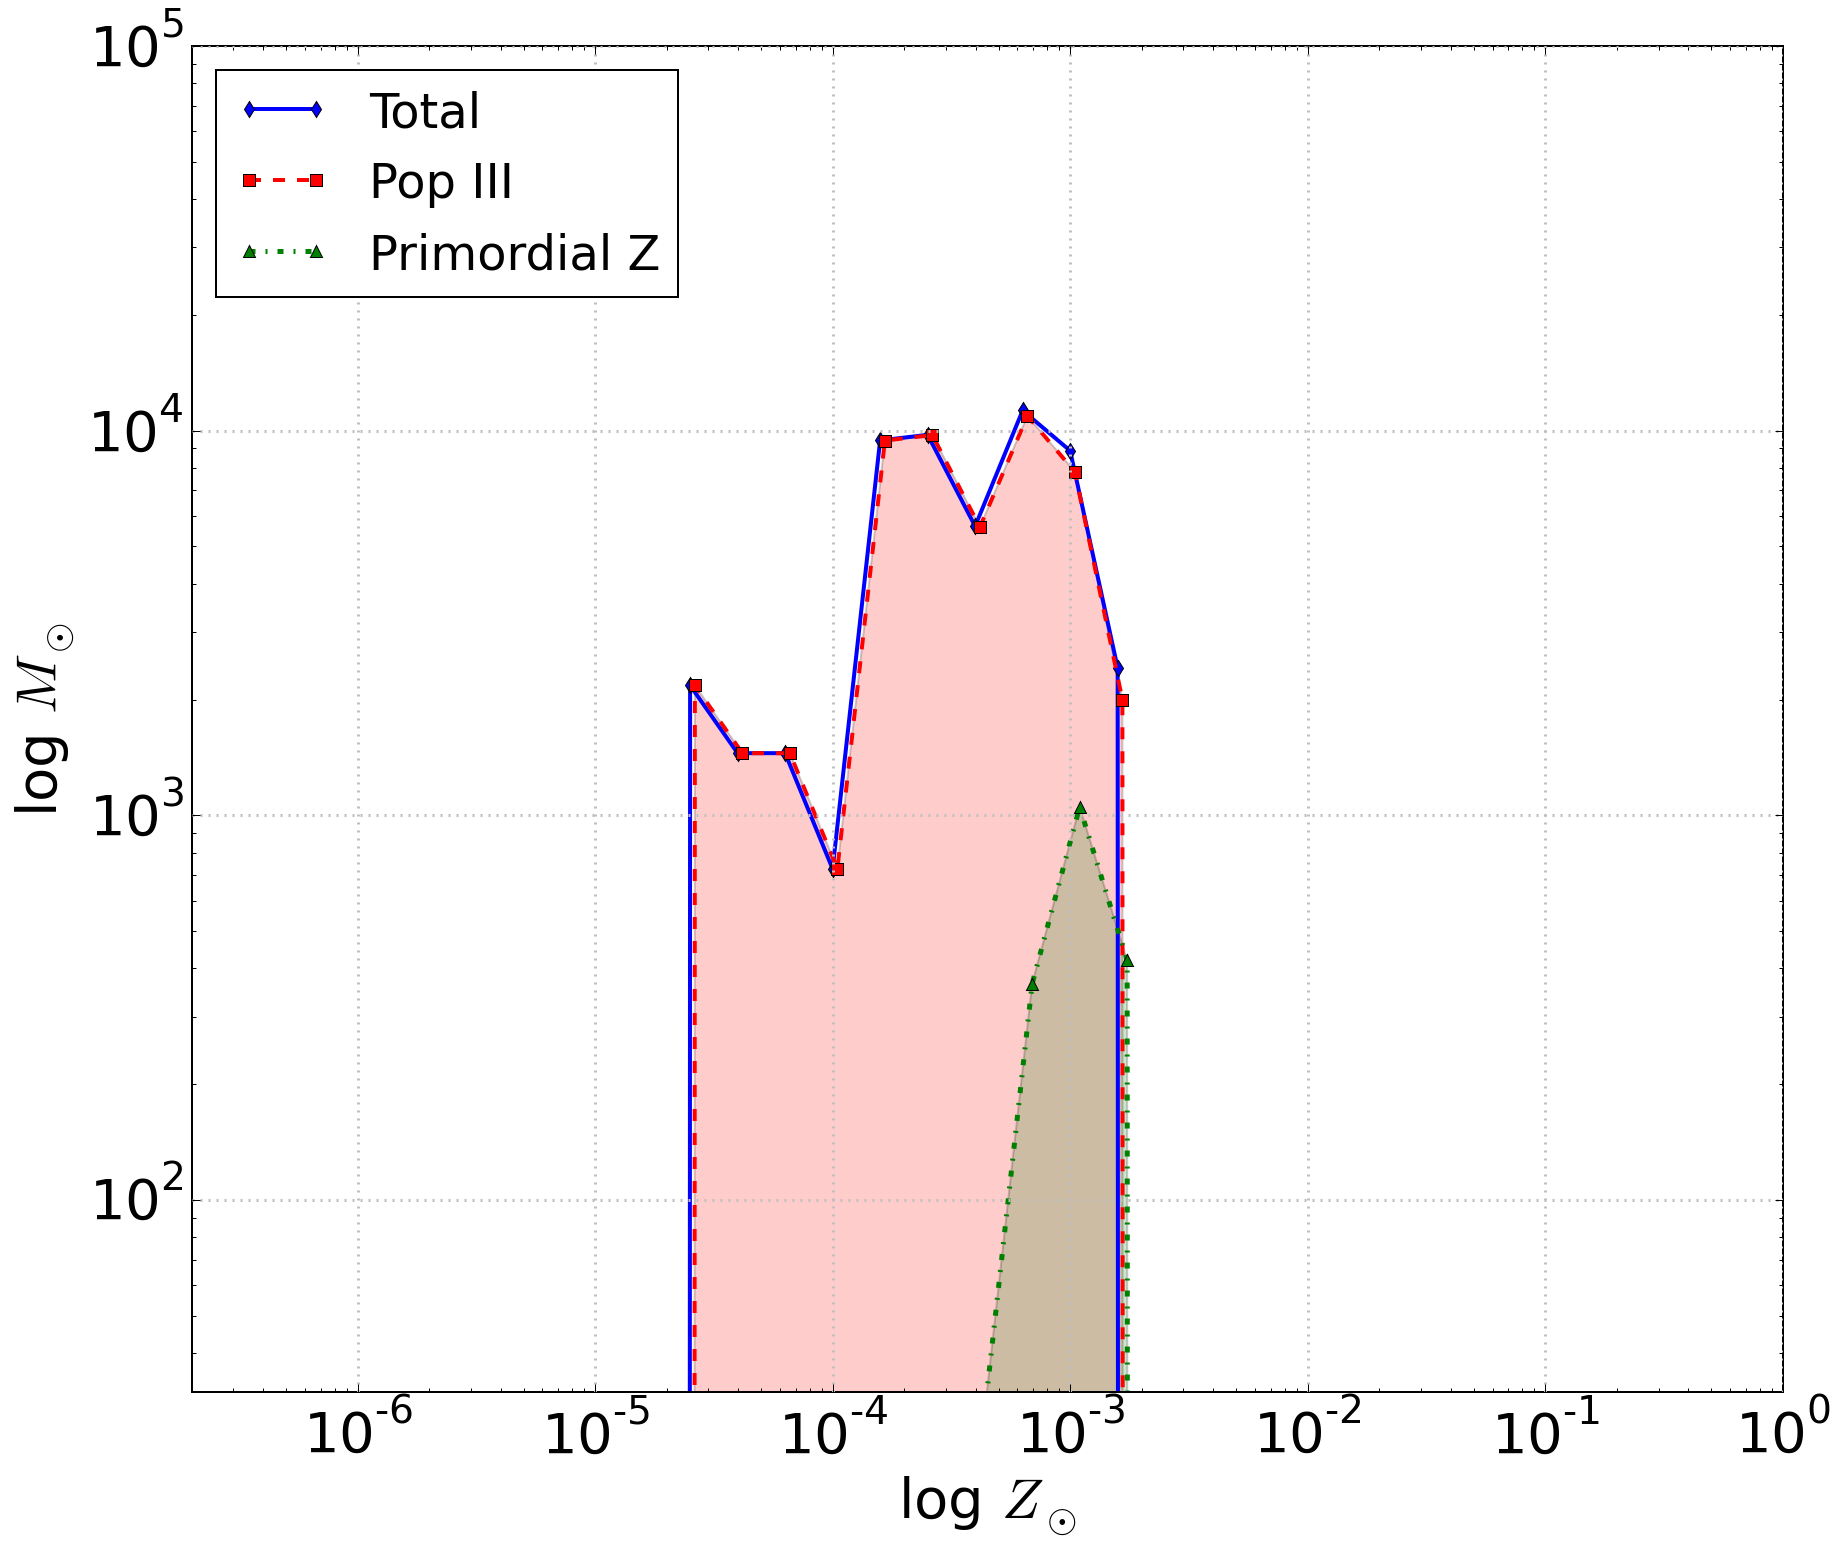

In [14]:
plt.rcParams['figure.figsize'] = (13,11)
plt.rcParams['font.size'] = 28
# We're gonna cheat a bit and just move the histogram value to the lower edge of the bin... 
# Our bins are small so this shouldn't even show... 
histRect = [0.1, 0.1, .85, 0.85]
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**5.0])

axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[:50],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[:50],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[:50],ppzSPM,'g-.^', linewidth = 2.5 )
axHist.fill_between(xrange2[:50], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[:50], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()

In [101]:
ppfSPM

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.16090327e+04,
         3.91795872e+04,   3.84434663e+04,   2.88459354e+04,
         7.59181742e+04,   7.16769433e+04,   9.97664659e+04,
         1.23192642e+05,   1.52167157e+05,   1.83215307e+05,
         1.92331772e+05,   1.42470063e+05,   1.01424797e+05,
         3.77475224e+04,   6.53890516e+03,   2.15710100e+02,
         2.19588786e+02,   1.08746572e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [15]:
prefix = "./"
# z=8, i=0 : -121.77, -104.01, -203.10
# z=8, i=265793 : -0.88, 215.56, 143.27
# z=8, i=531586 : 77.55, 54.08, 218.96
# z=8, i=797379 : 137.45, -200.82, -220.27
# z=16, i=0 : -20.26, -122.12, 40.22
# z=16, i=770 : 43.96, 26.56, 121.94
# z=16, i=1540 : 44.54, 19.03, 118.77

z = "8.0"; i = "0" 
totSPM = np.loadtxt(prefix + "totSM_z" + z + "-" + i +".txt")
ppfSPM = np.loadtxt(prefix + "pristSM_z" + z + "-" + i +".txt")
ppzSPM = np.loadtxt(prefix + "primordSM_z" + z + "-" + i +".txt")

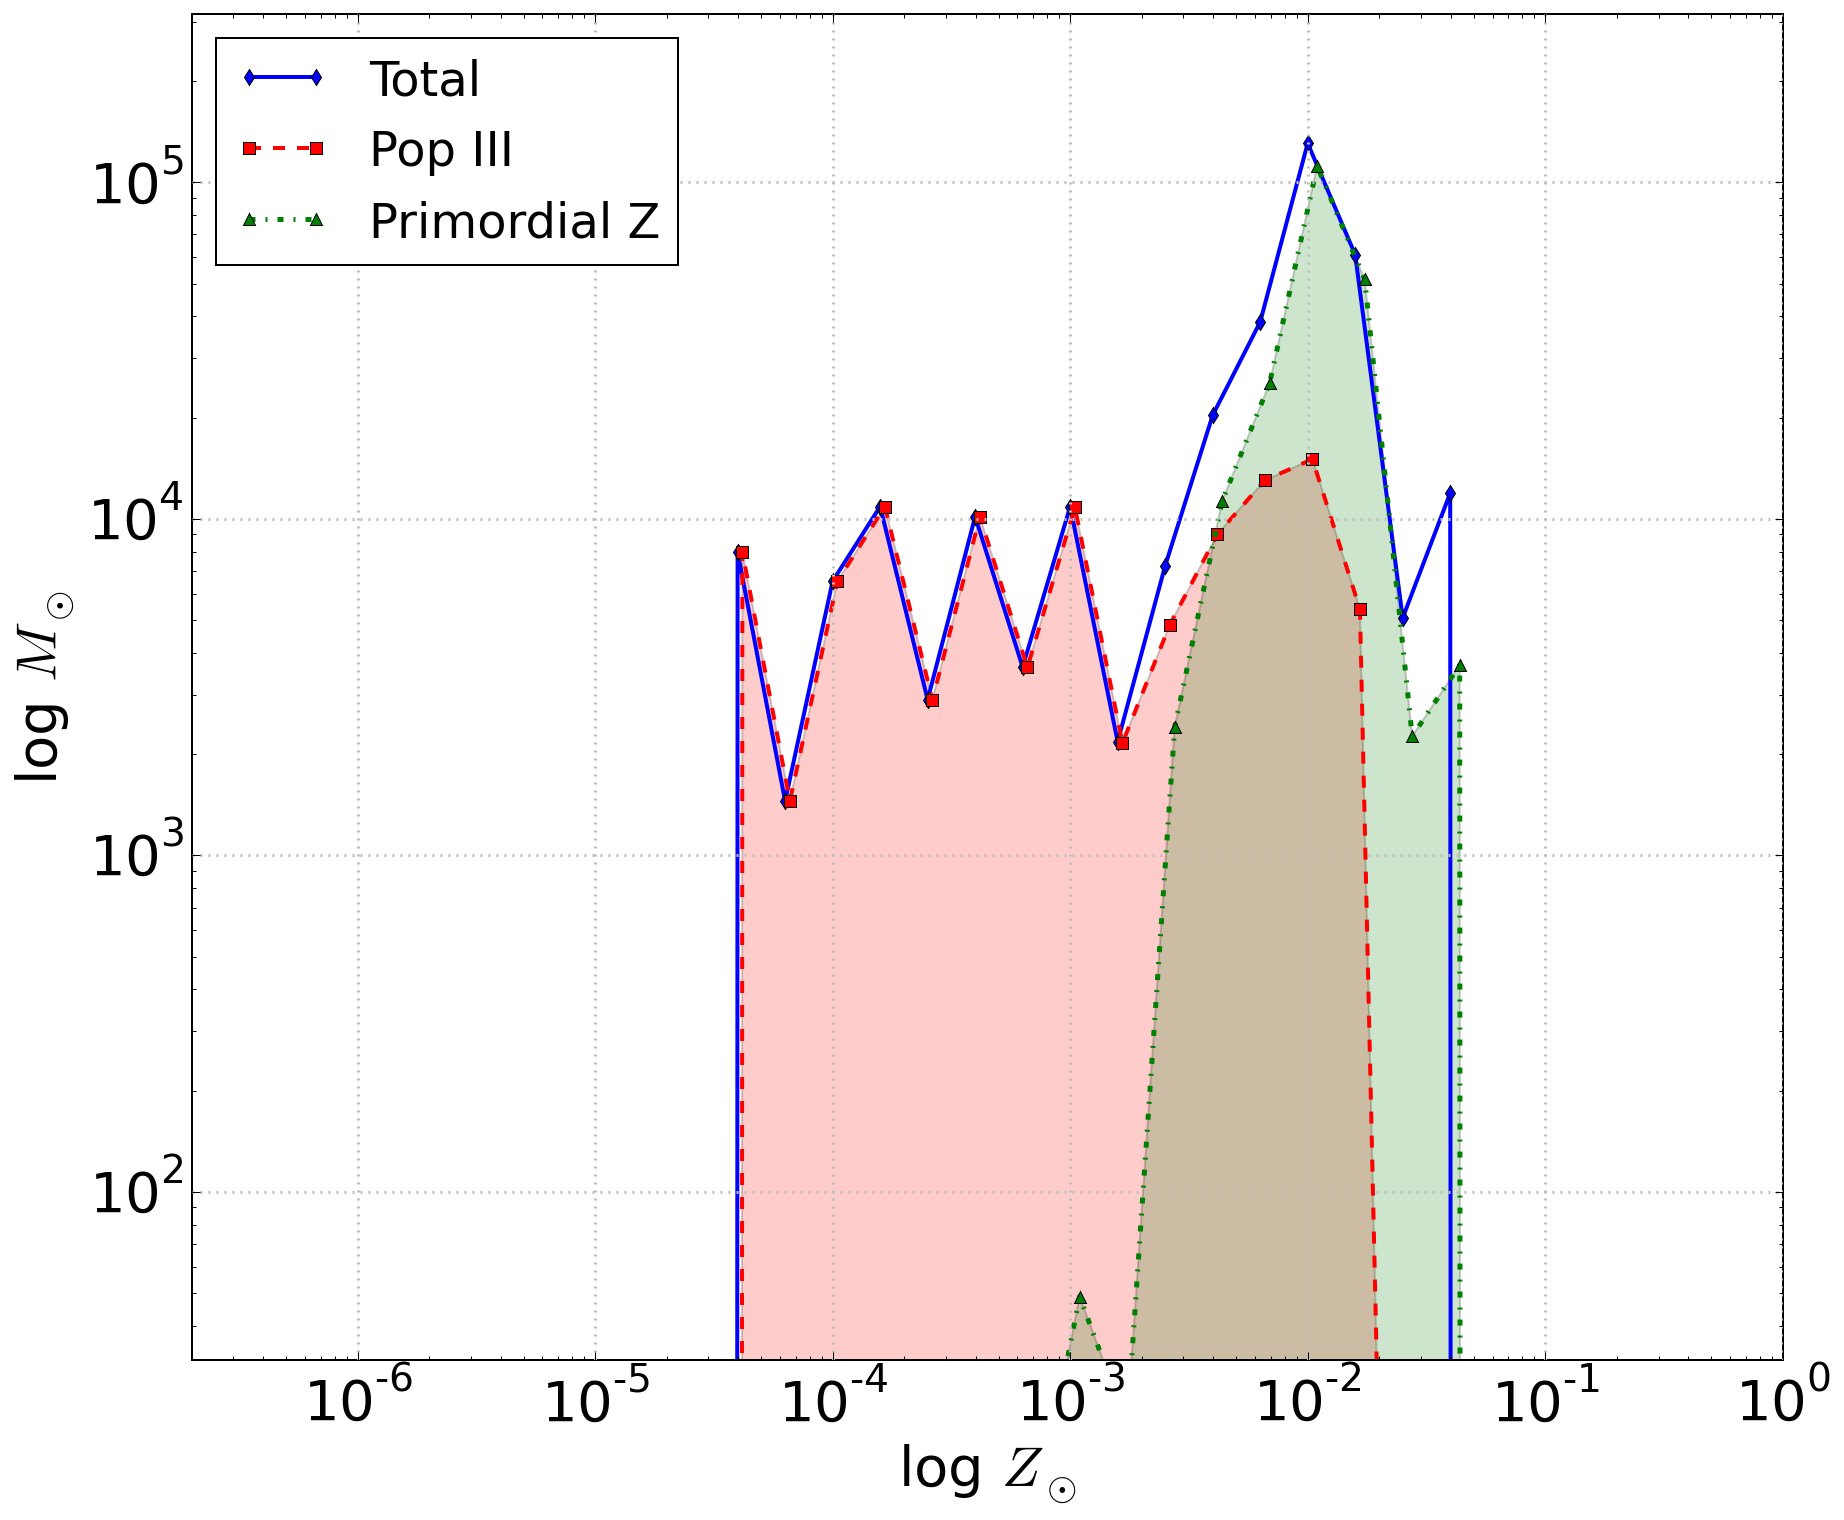

In [16]:
# Correcting... 
cond = ppzSPM>totSPM
ppzSPM[cond] = totSPM[cond]
axHist   = plt.axes(histRect)

axHist.set_xscale('log')
axHist.set_yscale('log')
axHist.set_xlim([2*10**-7,1])
axHist.set_ylim([10**1.5,10**5.5])


axHist.set_xlabel("log $Z_{\odot}$", size=28)
axHist.set_ylabel('log $M_{\odot}$', size=28)

axHist.plot(xrange1[:50],totSPM,'b-d',  linewidth = 2.0)
axHist.plot(xrange2[:50],ppfSPM, 'r--s', linewidth = 2.0 )
axHist.plot(xrange3[:50],ppzSPM,'g-.^', linewidth = 2.5 )
axHist.fill_between(xrange2[:50], 0, ppfSPM, facecolor='r', alpha=0.2)
axHist.fill_between(xrange3[:50], 0, ppzSPM, facecolor='g', alpha=0.2)

axHist.grid(color='0.75', linestyle=':', linewidth=1.5)
axHist.legend(['Total','Pop III','Primordial Z'],loc='upper left', fontsize=24 )
plt.savefig("Histz="+z+"SFRegion.pdf")
plt.show()



## Plot overall evolution... 

In [17]:
sfr = np.loadtxt(prefix + "new-data3Mpc.txt",skiprows=1)

In [18]:
# {
# {"z", "tStart", "tEnd", "totStarMass", "totPop3StarMass", 
#  "totPollStarMass", "totPrimordStarMass", "totGasMass", 
#  "totPristGasMass", "totSubcritStarMass", "totNonPrimordStarMass"}
#}

In [19]:
from matplotlib.ticker import FuncFormatter
# ##########################################################
# Format tick labels using their exponent only... 
# ##########################################################
def formatter(x,pos):
    return format(np.log10(x), '.0f')

In [20]:
h = 0.71
deltaT = sfr[:, 2] - sfr[:, 1]
nmlze  = 1.0 / deltaT / (3.0**3) * h**3

In [21]:
zData       = sfr[:,0]
totStarMass = sfr[:,3] * nmlze
popIIIMass  = sfr[:,4] * nmlze
pollMass    = sfr[:,5] * nmlze
primordMass = sfr[:,6] * nmlze
pristMass   = sfr[:,8] * nmlze
subCritMass = sfr[:,9] * nmlze

In [22]:
# Load PallottiniPopIII.txt
# Alread (x,log sfr)
pal = np.loadtxt(prefix + "PallottiniPopIII.txt",skiprows=1)
pz   = pal[:,0]
psfr = 10**pal[:,1]

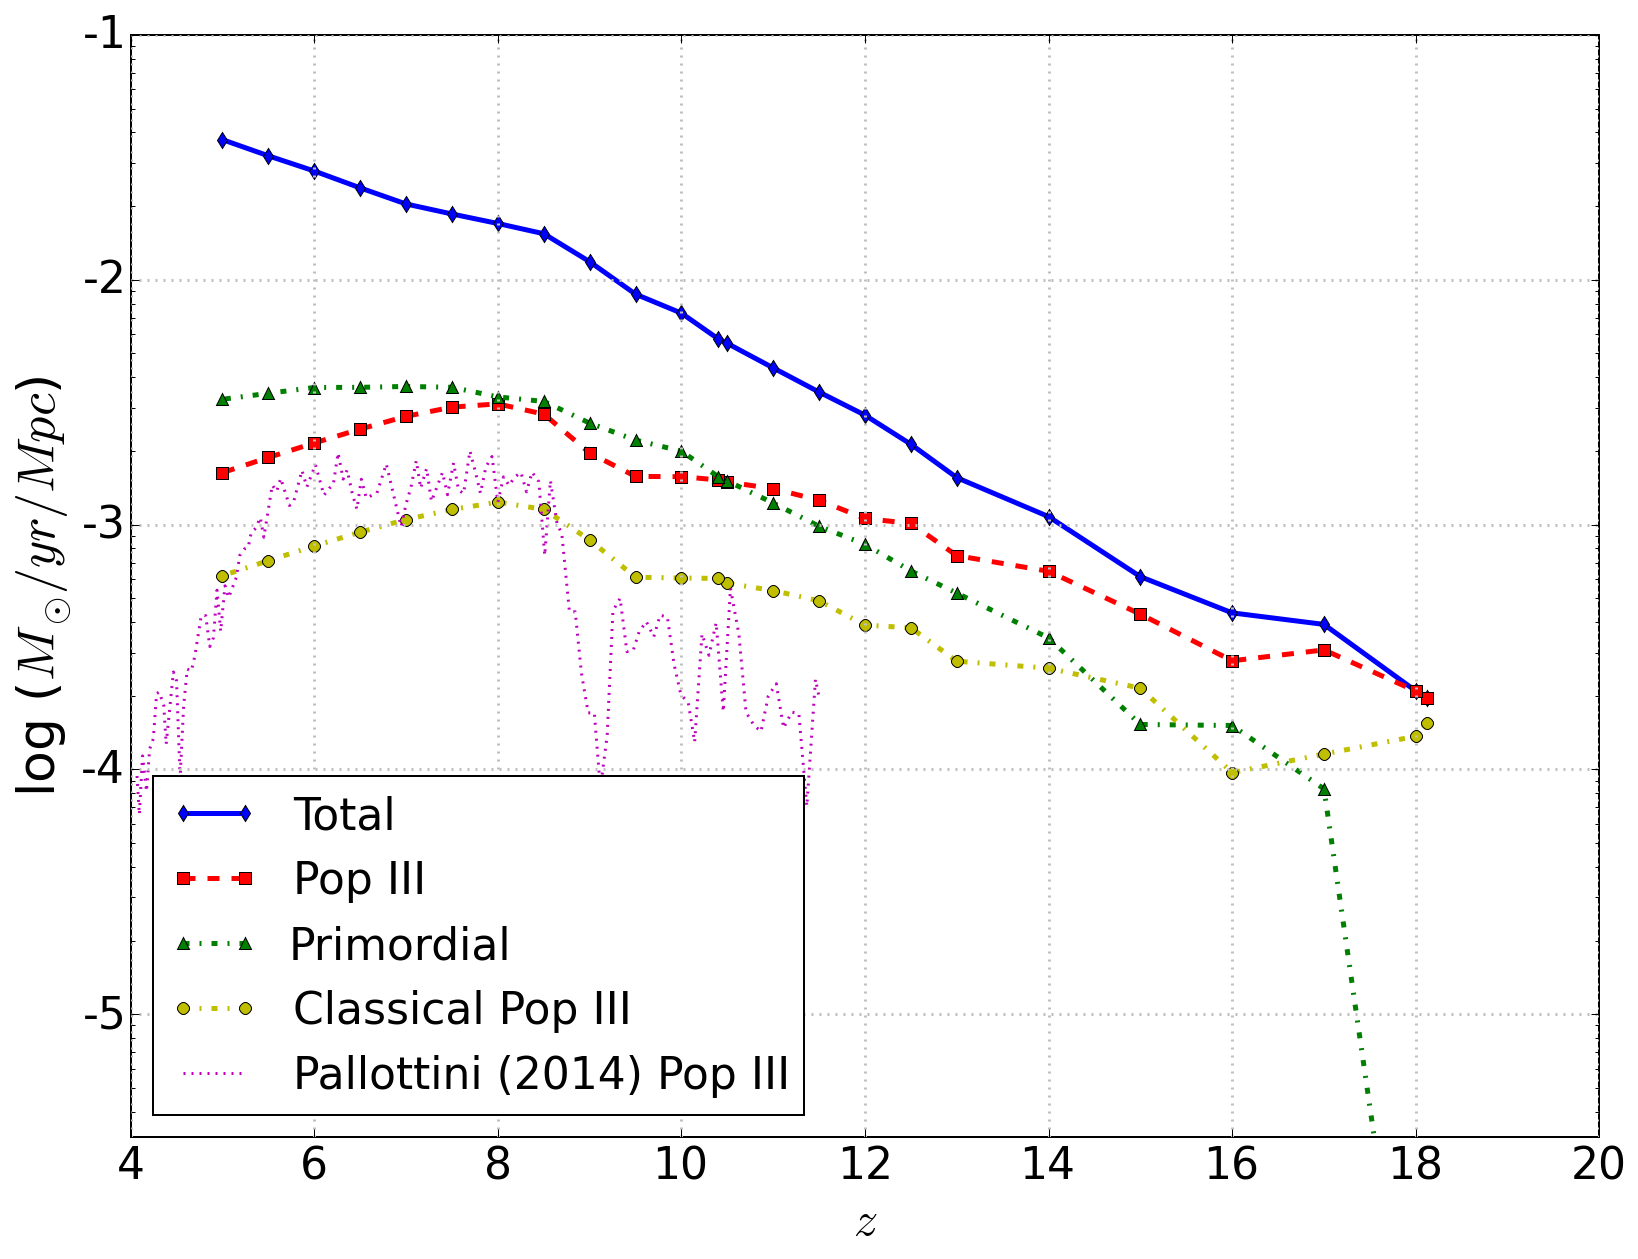

In [23]:
# FuncFormatter class instance defined from the function above
custom_formatter = FuncFormatter(formatter)

plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['font.size'] = 22

sfrRect = [0.1, 0.1, .85, 0.85]
axSFR   = plt.axes(sfrRect)

axSFR.set_yscale('log')
axSFR.set_ylim([10**-5.5,10**-1])

axSFR.set_xlabel("$z$", size=24)
axSFR.set_ylabel('log ($M_{\odot}/yr/Mpc$)', size=26)

axSFR.semilogy(zData,totStarMass,'b-d',  linewidth = 2.5 )
axSFR.semilogy(zData,popIIIMass, 'r--s', linewidth = 2.5 )
axSFR.semilogy(zData,primordMass,'g-.^', linewidth = 2.5 )
axSFR.semilogy(zData,subCritMass,'y-.o', linewidth = 2.5 )
axSFR.semilogy(pz,psfr,'m:', linewidth = 1.5 )
axSFR.yaxis.set_major_formatter(custom_formatter)
axSFR.grid(color='0.75', linestyle=':', linewidth=1.5)
axSFR.legend(['Total','Pop III','Primordial','Classical Pop III',"Pallottini (2014) Pop III"],
             loc='lower left', fontsize=22 )
plt.savefig("sfr.pdf")
plt.show()